In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
%matplotlib inline

In [3]:
#Read in CSV file containing the dataset in a dataframe using Pandas
df = pd.read_csv("C:/Users/Kok/Documents/Big Mart Sales/Train.csv")
df2 = pd.read_csv("C:/Users/Kok/Documents/Big Mart Sales/Test.csv")
print(df.shape)
print(df2.shape)

(8523, 12)
(5681, 11)


In [4]:
df.columns.values

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'], dtype=object)

In [38]:
df2.columns.values

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Size_Num'], dtype=object)

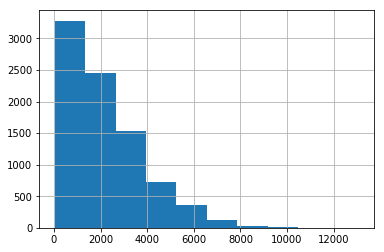

In [6]:
df['Item_Outlet_Sales'].hist()

In [5]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [29]:
#Filling in the Outlet Size Nulls with the mode (Medium)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace = True)
df2['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace = True)

In [31]:
#Adding a column to the dataframe with 1,2,3 representing Small, Medium, Large
conversion = {'Small':1, 'Medium':2, 'High':3}
df['Outlet_Size_Num'] = df['Outlet_Size'].map(conversion)
df2['Outlet_Size_Num'] = df2['Outlet_Size'].map(conversion)

In [13]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Size_Num                 0
dtype: int64

In [32]:
df2.apply(lambda x: sum(x.isnull()),axis=0)

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Outlet_Size_Num                0
dtype: int64

In [35]:
#Build a model to predict Item_Outlet_Sales based on Item_MRP and Outlet_Size
lr = LinearRegression()
x_train = df[["Item_MRP"]+["Outlet_Size_Num"]]
lr.fit(x_train,df[["Item_Outlet_Sales"]])
predictions = lr.predict(x_train)
scr = lr.score(x_train,df[["Item_Outlet_Sales"]])
print(scr)

0.3301729826488714


In [18]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'Item_Outlet_Sales ~ Outlet_Size_Num + Item_MRP', data = df)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     2100.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:49:03   Log-Likelihood:                -73815.
No. Observations:                8523   AIC:                         1.476e+05
Df Residuals:                    8520   BIC:                         1.477e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -479.6858     59.559     -8.054      0.000    -596.436    -362.936
Outlet_Size_Num   254.7675     25.205     10.108      0.000     205.360     304.176
Item_MRP           15.5679      0.243     64.072      0.000      15.092      16.044
==============================================================================
Omnibus:                      775.105   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1624.171
Skew:                           0.589   Prob(JB):                         0.00
Kurtosis:                       4.785   Cond. No.                         641.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Build a model to predict Item_Outlet_Sales based on Item_MRP and Outlet_Size and Item_Visibility
#Changed the 0s in Item Visibility to be the mean
df['Item_Visibility'] = df['Item_Visibility'].replace(0,np.mean(df['Item_Visibility']))
lr2 = LinearRegression()
lr.fit(df[["Item_MRP"]+["Outlet_Size_Num"]+['Item_Visibility']],df[["Item_Outlet_Sales"]])
predictions = lr.predict(df[['Item_MRP']+['Outlet_Size_Num']+['Item_Visibility']])
scr = lr.score(df[["Item_MRP"]+["Outlet_Size_Num"]+['Item_Visibility']],df[["Item_Outlet_Sales"]])
print(scr)

0.34579685539981775


In [40]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'Item_Outlet_Sales ~ Outlet_Size_Num + Item_MRP + Item_Visibility', data = df)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1501.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        19:43:04   Log-Likelihood:                -73715.
No. Observations:                8523   AIC:                         1.474e+05
Df Residuals:                    8519   BIC:                         1.475e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -121.6764     63.991     -1.901      0.057    -247.115       3.762
Outlet_Size_Num   228.9813     24.976      9.168      0.000     180.022     277.941
Item_MRP           15.5483      0.240     64.746      0.000      15.078      16.019
Item_Visibility -4387.8134    307.621    -14.264      0.000   -4990.825   -3784.802
==============================================================================
Omnibus:                      837.709   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1731.944
Skew:                           0.634   Prob(JB):                         0.00
Kurtosis:                       4.809   Cond. No.                     3.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""